# Mini Project 2 - Linear Regression

## Dataset 

Seoul Bikeshare Dataset Information:
> Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort. 
> It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. 
> Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Source Link: [Seoul Bikeshare Dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)

Problem Statement
- How many bikes are needed per hour, to maintain a consistent supply of bikes to meet demand?

## Data Dictionary

| Variable               | Definition                                           | Key                   |
|------------------------|------------------------------------------------------|-----------------------|
| Date                   | DD/MM/YYYY                                           |                       |
| Rented Bike count      | Count of bikes rented at each hour                   |                       |
| Hour                   | Hour of the day                                      | 0, 1, ..., 23         |
| Temperature            | in Celsius                                           |                       |
| Humidity               | in percentage (%)                                    |                       |
| Windspeed              | in metres per second (m/s)                           |                       |
| Visibility             | in 10 metres                                         |                       |
| Dew point temperature  | in Celsius                                           |                       |
| Solar radiation        | in Megajoules per square metre (MJ/m2)               |                       |
| Rainfall               | in millimeters (mm)                                  |                       |
| Snowfall               | in centimetre (cm)                                   |                       |
| Seasons                | Winter, Spring, Summer, Autumn                       |                       |
| Holiday                | Public Holidays in South Korean                      | Holiday/ No Holiday   |
| Functional Day         | Hour in the entry is a work hour of the day or not   |  Yes, No              |

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

%matplotlib inline

In [2]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize': (20, 6)})

In [3]:
import io
import requests

## Load Dataset 

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
s = requests.get(url).content
bike = pd.read_csv(io.StringIO(s.decode('latin-1')))

# Exploratory Data Analysis 

In [5]:
# First 5 rows
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Last 5 rows
bike.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# shape of dataframe
bike.shape

(8760, 14)

In [8]:
# datatypes of each column
bike.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [9]:
# Check if there are any null values
bike.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# renaming column names
bike = bike.rename(columns={"Date": "date", 
                            "Rented Bike Count": "rented_bike_count",
                            "Hour": "hour",
                            "Temperature(°C)": "temperature",
                            "Humidity(%)": "humidity",
                            "Wind speed (m/s)": "wind_speed",
                            "Visibility (10m)": "visibility",
                            "Dew point temperature(°C)": "dew_point_temperature",
                            "Solar Radiation (MJ/m2)": "solar_radiation",
                            "Rainfall(mm)": "rainfall",
                            "Snowfall (cm)": "snowfall",
                            "Seasons": "seasons",
                            "Holiday": "holiday",
                            "Functioning Day": "functioning_day"})

bike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
# changing date format to yyyy-mm-dd
from datetime import date
bike['date'] = pd.to_datetime(bike['date'])
bike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
# describe dataset
bike.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Check Each Variable 

### Check 'Date' Variable

In [13]:
# Convert datetime into day, month, year separately
import datetime as dt

# Create new columns
bike['day'] = bike['date'].dt.day
bike['month'] = bike['date'].dt.month
bike['year'] = bike['date'].dt.year

bike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [14]:
# checking if there are breaks in between dates
hour_check = bike.groupby('date')['hour'].size()
hour_check = pd.DataFrame(hour_check)
hour_check.head()

,hour
date,
2017-01-12,24
2017-02-12,24
2017-03-12,24
2017-04-12,24
2017-05-12,24


In [15]:
# since there are 24 hours in each day, we will check for anomalies if there are less or more than 24 hours in each day 
hour_check[(hour_check.hour > 24) | (hour_check.hour < 24)]
# result: shows none

,hour
date,


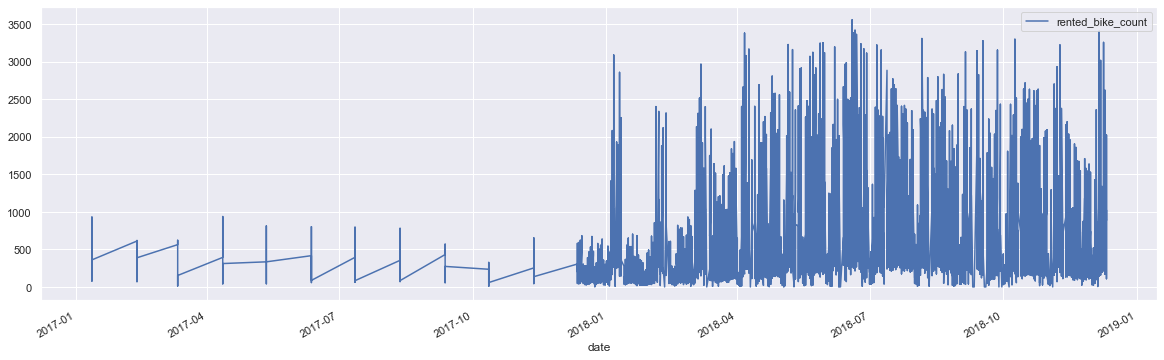

In [16]:
# how many bikes are rented per day?
bike_rented_per_day = bike[['date', 'rented_bike_count']]
bike_rented_per_day = bike_rented_per_day.set_index('date')

# timeseries plot of bike demand per day
ts = bike_rented_per_day
ts.plot();

### Check 'Seasons' Variable 

In [17]:
# how many seasons in total?
season_check = bike.groupby('seasons').size()
season_check

seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
dtype: int64

In [18]:
# Since there are 4 seasons recorded, we shall make each 'season' its own column
# Function to convert string into boolean
def autumn_to_bool(season):
    return 1 if season == 'Autumn' else 0

def spring_to_bool(season):
    return 1 if season == 'Spring' else 0

def summer_to_bool(season):
    return 1 if season == 'Summer' else 0

def winter_to_bool(season):
    return 1 if season == 'Winter' else 0

In [19]:
# creating new columns
bike['autumn'] = bike['seasons'].apply(autumn_to_bool)
bike['spring'] = bike['seasons'].apply(spring_to_bool)
bike['summer'] = bike['seasons'].apply(summer_to_bool)
bike['winter'] = bike['seasons'].apply(winter_to_bool)

In [20]:
# checking if function works
bike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,...,seasons,holiday,functioning_day,day,month,year,autumn,spring,summer,winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,12,1,2017,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,12,1,2017,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,No Holiday,Yes,12,1,2017,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,12,1,2017,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,No Holiday,Yes,12,1,2017,0,0,0,1


### Check 'Holiday' Variable 

In [21]:
# how many holiday types in total?
holiday_check = bike.groupby('holiday').size()
holiday_check

holiday
Holiday        432
No Holiday    8328
dtype: int64

In [22]:
# Function to convert 'Holiday' string into boolean
def holiday_to_bool(holiday):
    return 1 if holiday == 'Holiday' else 0

# applying column
bike['holiday'] = bike['holiday'].apply(holiday_to_bool)

In [23]:
# checking if function works
bike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,...,seasons,holiday,functioning_day,day,month,year,autumn,spring,summer,winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,0,Yes,12,1,2017,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,0,Yes,12,1,2017,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,0,Yes,12,1,2017,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,0,Yes,12,1,2017,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,0,Yes,12,1,2017,0,0,0,1


### Check 'Functioning Day' Variable

In [24]:
# how many functioning_day types in total?
functioning_day_check = bike.groupby('functioning_day').size()
functioning_day_check

functioning_day
No      295
Yes    8465
dtype: int64

In [25]:
# Function to convert 'Holiday' string into boolean
def func_day_to_bool(func_day):
    return 1 if func_day == 'Yes' else 0

# applying column
bike['functioning_day'] = bike['functioning_day'].apply(func_day_to_bool)

In [26]:
# checking if function works
bike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,...,seasons,holiday,functioning_day,day,month,year,autumn,spring,summer,winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,0,1,12,1,2017,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,0,1,12,1,2017,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,0,1,12,1,2017,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,0,1,12,1,2017,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,0,1,12,1,2017,0,0,0,1


### Final DataFrame for Linear Model 

In [27]:
# Taking out 'seasons', 'date' columns out
bike_df = bike.drop(['date', 'seasons'], 1)
bike_df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,holiday,functioning_day,day,month,year,autumn,spring,summer,winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,12,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,12,1,2017,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,12,1,2017,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,12,1,2017,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,12,1,2017,0,0,0,1


In [28]:
bike_df.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,holiday,functioning_day,day,month,year,autumn,spring,summer,winter
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315,0.966324,15.720548,6.526027,2017.915068,0.249315,0.252055,0.252055,0.246575
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.216537,0.180404,8.796749,3.448048,0.278796,0.432641,0.434217,0.434217,0.431042
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,4.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,16.000000,7.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,23.000000,10.000000,2018.000000,0.000000,1.000000,1.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,31.000000,12.000000,2018.000000,1.000000,1.000000,1.000000,1.000000


## Correlation between Variables 

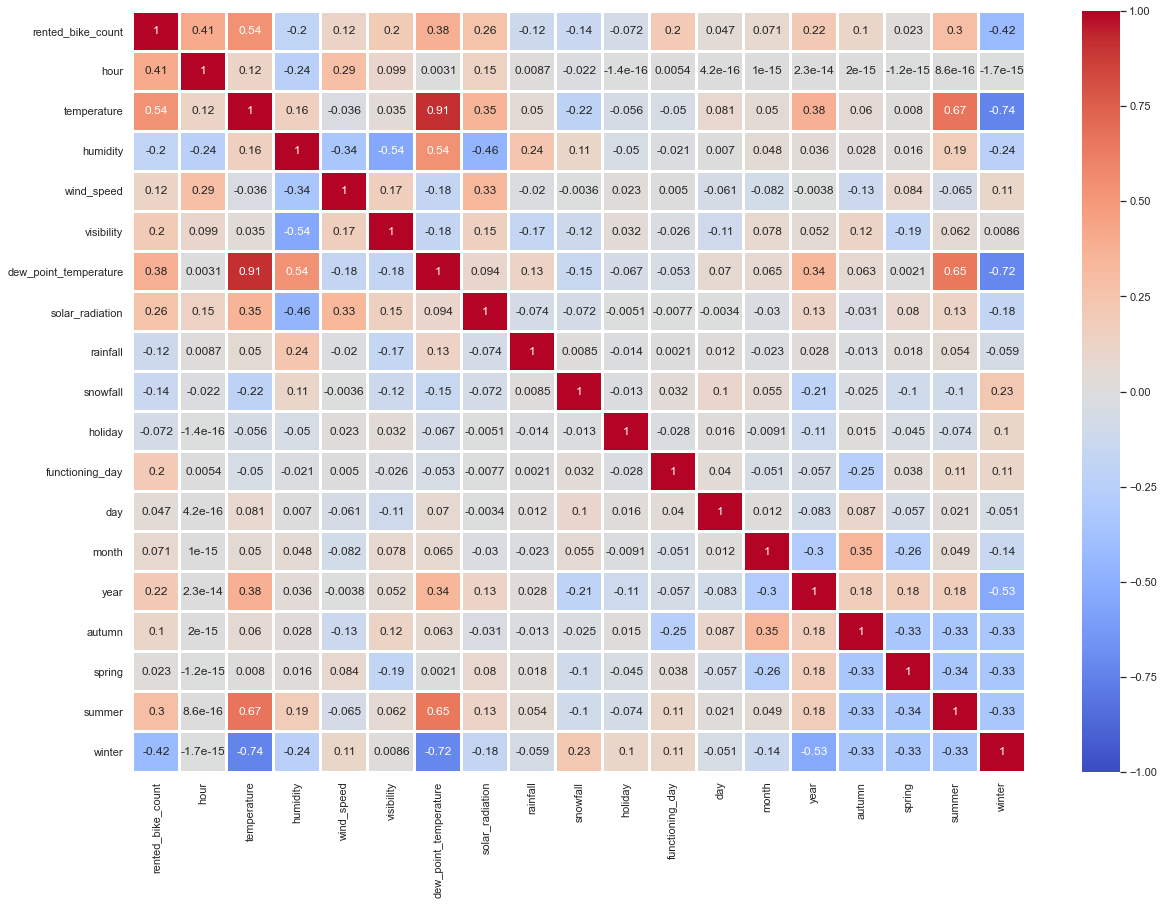

In [29]:
# see if there is any correlation between rented_bike_count and other variables
sns.set(rc={'figure.figsize': (20, 14)})
sns.heatmap(bike_df.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='white')
plt.show()

# Linear Regression Model

## Choosing the Best Predictor Variables

### Splitting dataset into Train and Test data 

In [30]:
# define the target variable (rented_bike_count) as y
y = bike_df['rented_bike_count']

# Take all columns except target as predictor columns
predictor_columns = [c for c in bike_df.columns if c != 'rented_bike_count']

# Load the dataset as a pandas data frame
X = pd.DataFrame(bike_df, columns = predictor_columns)

In [31]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
# Check train data shape
X_train.shape

(7008, 18)

In [33]:
# Check test data shape
X_test.shape

(1752, 18)

In [34]:
# Check train data shape
y_train.shape

(7008,)

In [35]:
# Check train data shape
y_train.shape

(7008,)

### Forward Feature Selection 

In [36]:
# Flag intermediate output
show_steps = False

In [37]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - (((1 - r2)*(n - 1))/(n - k - 1)) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature temperature with R^2 = 0.291 and adjusted R^2 = 0.291
Added feature hour with R^2 = 0.413 and adjusted R^2 = 0.412
Added feature functioning_day with R^2 = 0.460 and adjusted R^2 = 0.459
Added feature humidity with R^2 = 0.500 and adjusted R^2 = 0.499
Added feature winter with R^2 = 0.521 and adjusted R^2 = 0.520
Added feature rainfall with R^2 = 0.533 and adjusted R^2 = 0.531
Added feature solar_radiation with R^2 = 0.539 and adjusted R^2 = 0.538
Added feature autumn with R^2 = 0.544 and adjusted R^2 = 0.542
Added feature holiday with R^2 = 0.546 and adjusted R^2 = 0.544
Added feature year with R^2 = 0.547 and adjusted R^2 = 0.545
Added feature wind_speed with R^2 = 0.548 and adjusted R^2 = 0.545
Added feature day  with R^2 = 0.548 and adjusted R^2 = 0.545
Added feature snowfall with R^2 = 0.549 and adjusted R^2 = 0.545
Added feature dew_point_temperature with R^2 = 0.549 and adjusted R^2 = 0.545

Resulting features:
temperature, hour, functioning_day, humidity, winter, 

In [38]:
# From above, the best variables to be used to predict y (rented_bike_count) are:
included

['temperature',
 'hour',
 'functioning_day',
 'humidity',
 'winter',
 'rainfall',
 'solar_radiation',
 'autumn',
 'holiday',
 'year',
 'wind_speed',
 'day',
 'snowfall',
 'dew_point_temperature']

## Insert Best Predictor Variables into 1st Model

In [39]:
# define the target variable (rented_bike_count) as y (same as above)
y = bike_df['rented_bike_count']

In [40]:
# Using the variables from Forward Feature Selection as new predictor variables
X = bike_df[included]
X

,temperature,hour,functioning_day,humidity,winter,rainfall,solar_radiation,autumn,holiday,year,wind_speed,day,snowfall,dew_point_temperature
0,-5.2,0,1,37,1,0.0,0.0,0,0,2017,2.2,12,0.0,-17.6
1,-5.5,1,1,38,1,0.0,0.0,0,0,2017,0.8,12,0.0,-17.6
2,-6.0,2,1,39,1,0.0,0.0,0,0,2017,1.0,12,0.0,-17.7
3,-6.2,3,1,40,1,0.0,0.0,0,0,2017,0.9,12,0.0,-17.6
4,-6.0,4,1,36,1,0.0,0.0,0,0,2017,2.3,12,0.0,-18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,19,1,34,0,0.0,0.0,1,0,2018,2.6,30,0.0,-10.3
8756,3.4,20,1,37,0,0.0,0.0,1,0,2018,2.3,30,0.0,-9.9
8757,2.6,21,1,39,0,0.0,0.0,1,0,2018,0.3,30,0.0,-9.9
8758,2.1,22,1,41,0,0.0,0.0,1,0,2018,1.0,30,0.0,-9.8


### Splitting into Train and Test data

In [41]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12, test_size=0.20)

In [42]:
# Check train data shape
X_train.shape

(7008, 14)

In [43]:
# Check train data shape
y_train.shape

(7008,)

In [44]:
# Check test data shape
X_test.shape

(1752, 14)

In [45]:
# Check test data shape
y_test.shape

(1752,)

#### Unnormalised Linear Regression 

In [46]:
# Fit model using X_train, y_train
model = LinearRegression().fit(X_train, y_train)

In [47]:
# Make predictions using the testing set X
y_pred = model.predict(X_test)

In [48]:
# The mean squared error
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 182279.4393


In [49]:
# The coefficient of determination R^2: (1 is perfect prediction)
print('R^2 score: %.4f'
      % r2_score(y_test, y_pred))

R^2 score: 0.5490


#### Normalised Linear Regression 

In [50]:
# Fit model using X_train, y_train
model_norm = LinearRegression(normalize=True).fit(X_train, y_train)

In [51]:
# Make predictions using the testing set X
y_pred = model_norm.predict(X_test)

In [52]:
# The mean squared error
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 182279.4393


In [53]:
# The coefficient of determination R^2: (1 is perfect prediction)
print('R^2 score: %.4f'
      % r2_score(y_test, y_pred))

R^2 score: 0.5490


No actual difference between using unnormalised and normalised linear regression, so will just stick to unnormalised.

### Cross Validation: k-Fold 

In [54]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_mse = []
test_scores = []
test_mse = []

In [55]:
for k, (train_index, test_index) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train_index, ]
    y_train = y.iloc[train_index, ]
    X_test = X.iloc[test_index, ]
    y_test = y.iloc[test_index, ]
    
    # Fit model with training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions with training and test set 
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Score R2 and MSE on training and test sets and store in list
    rscore_train = model.score(X_train, y_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rscore_test = model.score(X_test, y_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Append into empty lists
    train_scores.append(rscore_train)
    train_mse.append(mse_train)
    test_scores.append(rscore_test)
    test_mse.append(mse_test)
    
# Create a metrics_df dataframe to display r2 and mse scores
metrics_df = pd.DataFrame({'train_scores':train_scores, 'train_mse':train_mse, 'test_scores':test_scores, 'test_mse':test_mse})
metrics_df

,train_scores,train_mse,test_scores,test_mse
0,0.551840,184738.500985,0.550351,193797.440109
1,0.551547,189092.868170,0.550846,176463.458823
2,0.551548,186233.766858,0.551534,187590.409093
3,0.550663,187612.573486,0.555432,182134.686986
4,0.553779,184351.035524,0.543248,195143.249973


### Checking our 1st Model (Pre-Regularisation)

In [56]:
# Describe the metrics
metrics_df.describe()

,train_scores,train_mse,test_scores,test_mse
count,5.000000,5.000000,5.000000,5.000000
mean,0.551875,186405.749005,0.550282,187025.848997
std,0.001152,1981.677071,0.004413,7866.907348
min,0.550663,184351.035524,0.543248,176463.458823
25%,0.551547,184738.500985,0.550351,182134.686986
50%,0.551548,186233.766858,0.550846,187590.409093
75%,0.551840,187612.573486,0.551534,193797.440109
max,0.553779,189092.868170,0.555432,195143.249973


In [57]:
# Take out only the mean scores and rmse from metrics_df
first_model = pd.DataFrame(metrics_df.mean()).T
first_model

,train_scores,train_mse,test_scores,test_mse
0,0.551875,186405.749005,0.550282,187025.848997


In [58]:
# checking the coefficients
model.coef_

array([  16.99794569,   27.29688623,  937.04981183,  -10.79273956,
       -271.56208627,  -63.11151006,  -80.33585692,  142.25056468,
       -119.26181756,  -95.44844697,   20.2828035 ,   -1.59964135,
         28.2961406 ,    9.58284106])

In [59]:
model.coef_.shape

(14,)

In [60]:
# Checking that X has same shape as coefficients
X.columns

Index(['temperature', 'hour', 'functioning_day', 'humidity', 'winter',
       'rainfall', 'solar_radiation', 'autumn', 'holiday', 'year',
       'wind_speed', 'day', 'snowfall', 'dew_point_temperature'],
      dtype='object')

In [61]:
X.columns.shape

(14,)

In [62]:
# Finding the intercept
model.intercept_

192543.65976245806

In [63]:
# Creating a dataframe that shows each predictor variable alongside its coefficient in linear regression model
pd.DataFrame(model.coef_, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
functioning_day,937.049812
autumn,142.250565
snowfall,28.296141
hour,27.296886
wind_speed,20.282804
temperature,16.997946
dew_point_temperature,9.582841
day,-1.599641
humidity,-10.792740
rainfall,-63.111510


In [64]:
# Viewing coefficients in a graph
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

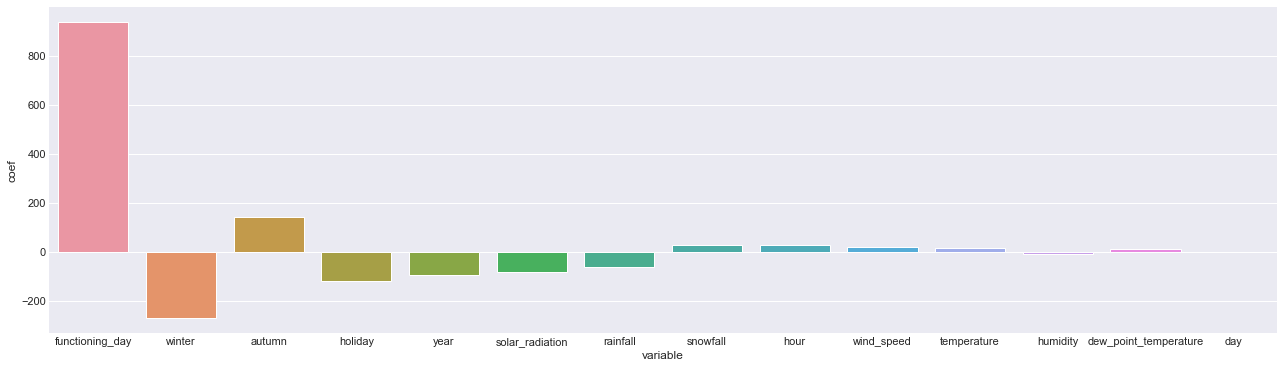

In [65]:
# Plot Coefficients
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(22, 6))
view_coeff(X, model)

## Regularisation

### Ridge Regression Model 

In [66]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge(random_state = 12)

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-9, 10, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

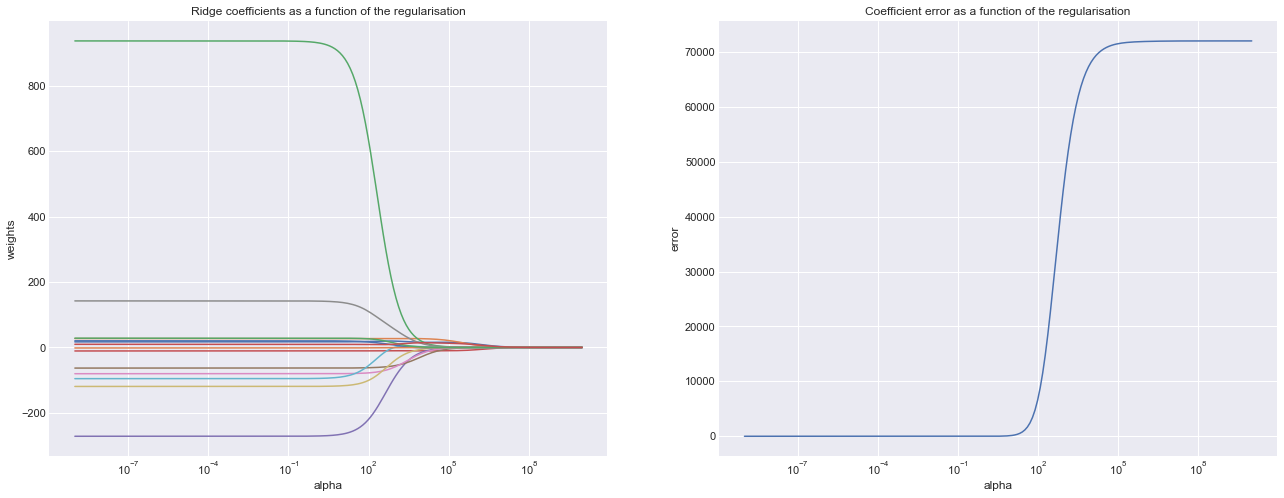

In [67]:
# Display results
plt.figure(figsize = (22, 8))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

### Cross Validation of Ridge Regression Model 

In [68]:
# Finding an optimal value for Ridge regression alpha by using train data
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5) #cv = 5, it performs 5-fold cross validation
optimal_ridge.fit(X_train, y_train)
print('Alpha:', optimal_ridge.alpha_)
print('R^2 Score:', optimal_ridge.score(X_train, y_train))

Alpha: 148.202070579886
R^2 Score: 0.5416646988166431


In [69]:
# optimal_ridge = RidgeCV(alphas=ridge_alphas) #when cv is not specified, it performs Leave-One-Out Cross-Validation
# optimal_ridge.fit(X_train, y_train)
# print('Alpha:', optimal_ridge.alpha_)
# print('R^2 Score:', optimal_ridge.score(X_train, y_train))

In [70]:
# Creating a dataframe that shows each predictor variable alongside its coefficient in ridge regression model
pd.DataFrame(optimal_ridge.coef_, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
functioning_day,547.677267
autumn,100.889803
hour,27.426727
snowfall,25.248585
temperature,18.753029
wind_speed,15.383706
dew_point_temperature,8.710628
day,-0.955336
humidity,-10.354618
year,-44.000114


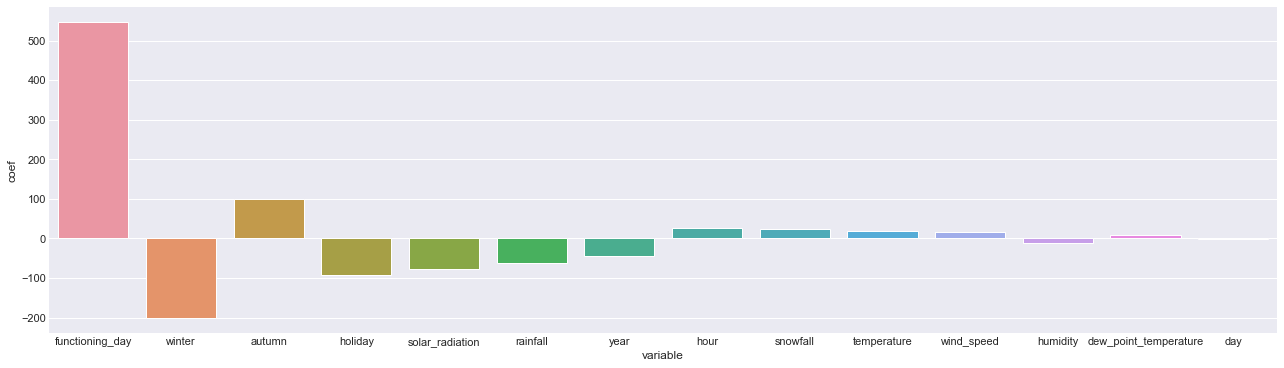

In [71]:
# Viewing the optimal ridge coefficients
plt.figure(figsize=(22, 6))
view_coeff(X_train, optimal_ridge)

### Checking our 2nd Model (Regularised) 

In [72]:
# R^2 score of train dataset
train_scores_ridge = optimal_ridge.score(X_train, y_train)
print('R^2 Score of train data: %.4f'
      % train_scores_ridge)

R^2 Score of train data: 0.5417


In [73]:
# Make predictions using the training set X on the optimal ridge model
y_train_pred_ridge = optimal_ridge.predict(X_train)

# The mean squared error using the training set X after regularisation
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)

print('Mean squared error of train data: %.4f'
      % train_mse_ridge)

Mean squared error of train data: 189355.8345


In [74]:
# R^2 score of test dataset
test_scores_ridge = optimal_ridge.score(X_test, y_test)
print('R^2 Score of test data: %.4f'
      % test_scores_ridge)

R^2 Score of test data: 0.5327


In [75]:
# Make predictions using the testing set X on the optimal ridge model
y_test_pred_ridge = optimal_ridge.predict(X_test)

# The mean squared error using the testing set X after regularisation
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print('Mean squared error of test data: %.4f'
      % test_mse_ridge)

Mean squared error of test data: 199634.5146


In [76]:
# Creating a dataframe from a dictionary of train and test scores
second_model = pd.DataFrame.from_dict({'train_scores':train_scores_ridge, 'train_mse':train_mse_ridge, 'test_scores':test_scores_ridge, 'test_mse':test_mse_ridge}, orient='index').T
second_model

,train_scores,train_mse,test_scores,test_mse
0,0.541665,189355.834524,0.532735,199634.514591


# Evaluation

## Comparing 1st Model & 2nd Model

1st Model: Linear Regression Model with 5-Fold Cross Validation

In [77]:
first_model

,train_scores,train_mse,test_scores,test_mse
0,0.551875,186405.749005,0.550282,187025.848997


2nd Model: Ridge Regression Model with 5-Fold Cross Validation

In [78]:
second_model

,train_scores,train_mse,test_scores,test_mse
0,0.541665,189355.834524,0.532735,199634.514591


Possibility 1: The first model is not overfitted. Even though it has a slighty worse R^2 score in the train dataset (compared to the train dataset in second model), it produces a higher mean squared error in the test dataset, compared to the second model.
> Tested with random state (in Section 4.2.1 and 4.3.1): 12, 20, 110, 123, 225

Possibility 2: The second model produces a lower mean squared error using the test data to predict y (demand for rented bikes per hour). Therefore, it is better.
> Tested with random state (in Section 4.2.1 and 4.3.1): (none of the random states gives this result)

 Comparing the two above, I will use the first model to predict the demand of rented bikes (since that's the result shown after testing by random states).